### Linear Regression Model

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


### Example : Recommend the marketing plan based on advertising data to result in high Product sales.


In [3]:
# read data into a DataFrame
#sales_data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
sales_data = pd.read_csv('C:\\Users\\jp\\python_ML_training_Corp\\Advertising_v1.csv', index_col=0)
sales_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Predictors or Features or dependent Variable
- TV : advertising budgets(in thousands of dollars) spent on TV ads for a single product in a market.
- Radio : advertising budgets(in thousands of dollars) spent on Radio ads.
- Newspaper : advertising budgets(in thousands of dollars) spent on Newspaper ads.

### Response or Independent Variable
- Sales : Sales of a single product in a given market (in thousands units)

In [4]:
sales_data.shape  # 200 markets ads data and related sales

(200, 4)

In [11]:
# Rename the column
sales_data.rename(columns ={'sales':'Sales', 'radio':'Radio', 'newspaper':'Newspaper'}, inplace=True)
sales_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Scatter plot to visulize the realtionship between differrent ads and sales.

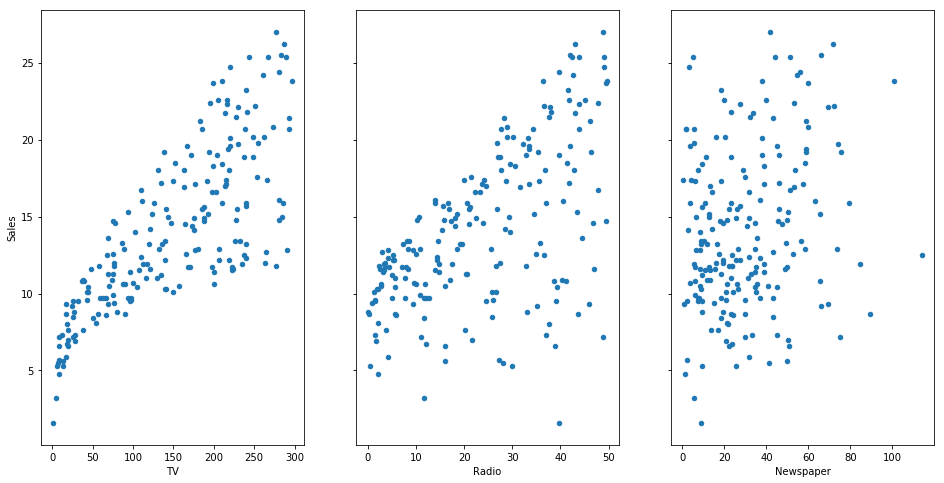

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True)
sales_data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
sales_data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
sales_data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

#### Simple Linear Regression Model using statsmodel

In [13]:
import statsmodels.formula.api as smf

# fit the linear regression model of Sales vs TV-ads
lm_reg = smf.ols(formula='Sales ~ TV', data=sales_data).fit()

# Print the estimated coeficietns
lm_reg.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [45]:
X_new = pd.DataFrame({'TV': [sales_data.TV.min(), sales_data.TV.max()]})
preds = lm_reg.predict(X_new)

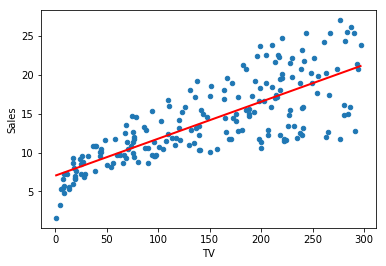

In [46]:
# Scatter plot TV vs Sales
sales_data.plot(kind='scatter', x='TV', y='Sales')

# Regression line estimated  - Sales = 7.032594 + 0.047537 * TV
plt.plot(X_new, preds, c='red', linewidth=2)


In [19]:
# Estimated regression model equation
# Sales = 7.032594 + 0.047537 * TV

# predict the products Sales, if TV ads budget = $100K
Sales = 7.032594 + 0.047537 * 100
Sales  

11.786294

In [17]:
# print the p-values for the model coefficients
lm_reg.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
# print the R-squared value for the model
lm_reg.rsquared

0.61187505085007099

In [26]:
print(lm_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           1.47e-42
Time:                        15:27:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
# Estimated Regression Model Interpretation
# Sales = 7.032594 + 0.047537 * TV

# B0(intercept) = 7.032594 => In case of TV ads budget= $0k, the estimated product sales would be 7.03K.
# B1(slope)     = 0.047537 => for each unit increase in the TV ads budget (in thousand), the product sales would 
#                             increase on average by 0.04 K.

#1: - F Test,  p<.05 => indicates that Model is significant predicting Sales based on TV ads predictor.
#                             
#2: - Adj Rsq = .61 => Indicates that around 61% of total sample Variation of the Response Sales is 
#                       explained by predictors TV ads.
#
#3: - Standard error(s) = 3.26 => 95% conf intv of all the predicted values will be prediction +- 2*s
#
#4: - t-test of predictors TV ads = p <.05 indicate that TV-ads is signinificant for predicting Sales.


In [20]:
# Model:  Sales = 7.032594 + 0.047537 * 100  = 11.78625759
  
# Using model, predict the sales for TV-ads=$100K 
X_new = pd.DataFrame({'TV': [100]})
lm_reg.predict(X_new)

array([ 11.78625759])

#### Multiple Linear Regression 

When we build the Regression Model with multiple features that is known as Multiple Regression.


In [25]:
# create a fitted model with all three features
lm_multreg = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=sales_data).fit()

# print the coefficients
lm_multreg.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [27]:
# model summary
print(lm_multreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           1.58e-96
Time:                        15:29:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
# For TV, p-value <0.05 => it is significant to predict the sales
# for Radio, p-value <0.05 => it is significant to predict the sales
# for Newspaper, p-value >0.05 => it is not significant to predict the sales

# Adj Rsq = .896 => Indicates that around 89.6% of total sample Variation of the Response Sales is 
#                       explained by ads predictors TV, Radio and Newspapers.

# Final Estimated regression model
# Sales = 2.9389 + 0.0458*TV + 0.1885*Radio